In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 그래프 기본 테마 설정
sns.set_style("white")
sns.set_context("notebook")

# 폰트 적용
import platform
from matplotlib import font_manager as fm
font_path = "font/NanumGothic.ttf"

font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.facecolor'] = 'white'      # 축 배경 흰색
plt.rcParams['figure.facecolor'] = 'white'    # 전체 배경 흰색
plt.rcParams['axes.grid'] = False             # 그리드 제거
plt.rcParams['savefig.facecolor'] = 'white'   # 저장 이미지 배경도 흰색

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
df = pd.read_csv('data/merged_data_brand_dropna.csv')

In [5]:
# event_type 순서 고정
event_order = ['view', 'cart', 'remove_from_cart', 'purchase']

# event_type별 price 통계
event_price_stats = (
    df.groupby('event_type')['price']
      .agg(
          count='count',
          mean='mean',
          std='std',
          min='min',
          q25=lambda x: x.quantile(0.25),
          median='median',
          q75=lambda x: x.quantile(0.75),
          max='max'
      )
      .reset_index()
)

# 순서 지정
event_price_stats['event_type'] = pd.Categorical(
    event_price_stats['event_type'],
    categories=event_order,
    ordered=True
)

event_price_stats = event_price_stats.sort_values('event_type').reset_index(drop=True)

event_price_stats

,event_type,count,mean,std,min,q25,median,q75,max
0,view,5682110,13.865270,28.108813,0.06,2.78,5.24,10.32,327.78
1,cart,3270461,5.514218,11.761452,0.06,1.59,3.17,5.56,327.78
2,remove_from_cart,2236187,5.516838,11.418886,0.06,1.73,3.57,5.54,327.78
3,purchase,736971,5.136884,10.034198,0.06,1.59,3.02,5.38,327.78


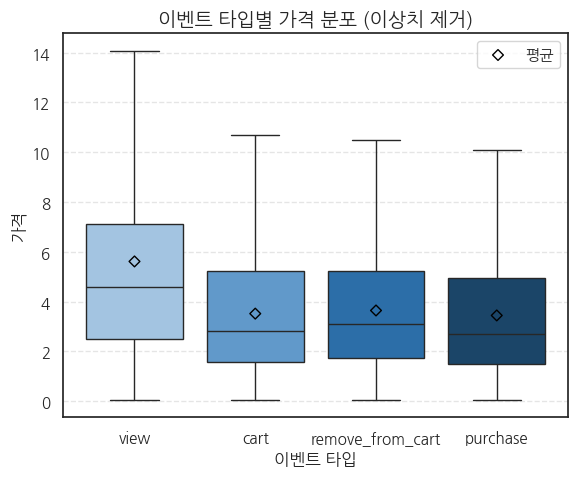

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. event_type 순서
event_order = ['view', 'cart', 'remove_from_cart', 'purchase']

# 2. 팔레트
custom_palette_4 = [
    '#99c5eb',
    '#509adB',
    '#1770bd',
    '#0e4675'
]

# 3. IQR을 이용한 이상치 제거 함수
def remove_outliers_iqr(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['price'] >= lower_bound) & (group['price'] <= upper_bound)]

df_no_outliers = df.groupby('event_type', group_keys=False).apply(remove_outliers_iqr)

# 4. 박스플롯 (이상치 제거 후)
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df_no_outliers[df_no_outliers['event_type'].isin(event_order)],
    x='event_type', 
    y='price', 
    order=event_order,
    palette=custom_palette_4,
    showfliers=False  # 이상치 표시 X
)

# 5. 평균(mean) 표시 (속이 빈 원, 검정 테두리, 지름 축소)
means = df_no_outliers.groupby('event_type')['price'].mean()
for i, ev in enumerate(event_order):
    plt.scatter(
        i, means[ev], 
        facecolors='none', edgecolors='black',
        marker='D', s=30, zorder=3, 
        label='평균' if i == 0 else ""
    )

# 6. 스타일
plt.title('이벤트 타입별 가격 분포 (이상치 제거)', fontsize=14)
plt.xlabel('이벤트 타입', fontsize=12)
plt.ylabel('가격', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

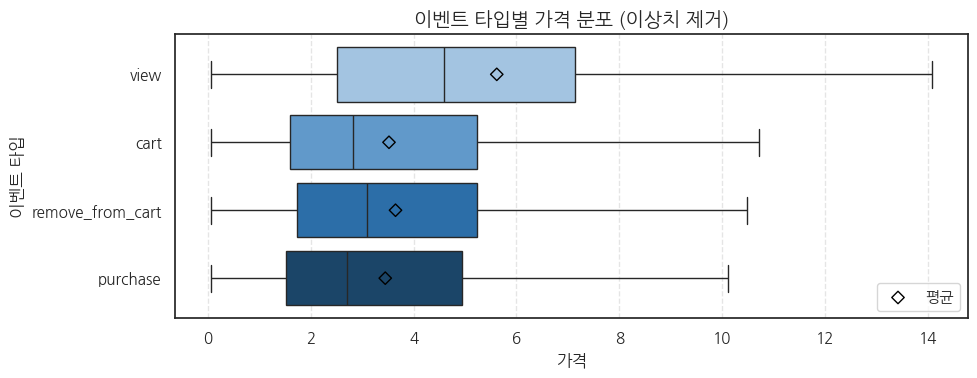

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. event_type 순서
event_order = ['view', 'cart', 'remove_from_cart', 'purchase']

# 2. 팔레트
custom_palette_4 = [
    '#99c5eb',
    '#509adB',
    '#1770bd',
    '#0e4675'
]

# 3. IQR을 이용한 이상치 제거 함수
def remove_outliers_iqr(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['price'] >= lower_bound) & (group['price'] <= upper_bound)]

df_no_outliers = df.groupby('event_type', group_keys=False).apply(remove_outliers_iqr)

# 4. 박스플롯 (수평, 이상치 제거 후)
plt.figure(figsize=(10, 4))  # 가로폭 ↑, 세로폭 ↓
sns.boxplot(
    data=df_no_outliers[df_no_outliers['event_type'].isin(event_order)],
    y='event_type', 
    x='price', 
    order=event_order,
    palette=custom_palette_4,
    showfliers=False  # 이상치 표시 X
)

# 5. 평균(mean) 표시 (속 빈 다이아몬드, 검정 테두리)
means = df_no_outliers.groupby('event_type')['price'].mean()
for i, ev in enumerate(event_order):
    plt.scatter(
        means[ev], i,  # x축: 가격, y축: event_type 위치
        facecolors='none', edgecolors='black',
        marker='D', s=40, zorder=3, 
        label='평균' if i == 0 else ""
    )

# 6. 스타일
plt.title('이벤트 타입별 가격 분포 (이상치 제거)', fontsize=14)
plt.ylabel('이벤트 타입', fontsize=12)
plt.xlabel('가격', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()